## 문제 : 다음 분기에 어떤 게임을 설계해야 할까?
1. 지역에 따라서 선호하는 게임 장르가 다를까 ?
2. 연도별 게임의 트렌드가 있을까 ?
3. 출고량이 높은 게임에 대한 분석 및 시각화

In [1]:
from google.colab import files

myfiles = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 제작한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.

In [3]:
import pandas as pd
import numpy as np

game = pd.read_csv('vgames2.csv')
game = game.loc[:,'Name':'Other_Sales']

# 결측치를 확인했을 때 결측치를 가진 열은 최대 379개로, 결과에 큰 영향을 미치지 않을 것이라 생각하고 제거해줌
game.isnull().sum()
game = game.dropna(axis=0)

game.dtypes # game 데이터 타입을 확인했을 때 Sales 값이 숫자형 데이터가 아님을 확인할 수 있다.

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [4]:
# Sales 단위를 million으로 맞춰줌

def to_million(data):
  if 'M' in data:
    result = data.replace("M","")
    result = pd.to_numeric(result)
  elif 'K' in data:
    data1 = data.replace("K","")
    result = pd.to_numeric(data1) * 0.001
  else:
    result = pd.to_numeric(data)
  return result


In [5]:
game['NA_Sales'] = game['NA_Sales'].apply(to_million)
game['EU_Sales'] = game['EU_Sales'].apply(to_million)
game['JP_Sales'] = game['JP_Sales'].apply(to_million)
game['Other_Sales'] = game['Other_Sales'].apply(to_million)

In [6]:
game.dtypes   # sales 데이터타입이 float로 바뀐 것을 확인할 수 있다.

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [7]:
# 19xx ~ 20xx 형태가 아닌 데이터들을 확인할 수 있음

game['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [8]:
# 0~22는 2000을 더해 20xx 로 만들어주고, 23~100은 1900을 더해 19xx형태로 만들어준다.

def to_year(data):
    if 0 <= data <= 22:
        data = 2000 + data
    elif 22 < data < 100:
        data = 1900 + data
    else:
        data = data
    return int(data)

game['Year'] = game['Year'].apply(to_year)
game['Year'].value_counts() # 모두 19xx~20xx형태로 잘 바뀌었음을 확인

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

## 1. 지역에 따라 선호하는 게임 장르가 다를까?





In [9]:
# 지역에따라 장르별로 판매량을 합해줌

na_genre = game['NA_Sales'].groupby(game['Genre']).sum()
eu_genre = game['EU_Sales'].groupby(game['Genre']).sum()
jp_genre = game['JP_Sales'].groupby(game['Genre']).sum()
ot_genre = game['Other_Sales'].groupby(game['Genre']).sum()


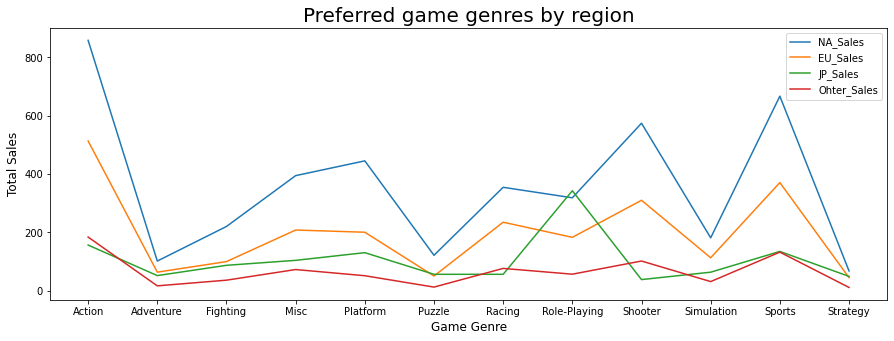

In [10]:
# 그래프의 추세가 각 지역별로 비슷하게 보이나 Role-playing에서 일본이 다른 지역과 다름을 볼 수 있다.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.plot(na_genre, label='NA_Sales')
plt.plot(eu_genre, label='EU_Sales')
plt.plot(jp_genre, label='JP_Sales')
plt.plot(ot_genre, label='Ohter_Sales')

plt.title('Preferred game genres by region',fontsize=20)
plt.xlabel('Game Genre',fontsize=12)
plt.ylabel('Total Sales',fontsize=12)

plt.legend()
plt.show()

In [11]:
rank_na = pd.DataFrame(na_genre.sort_values(ascending=False).head(5))
rank_eu = pd.DataFrame(eu_genre.sort_values(ascending=False).head(5))
rank_jp = pd.DataFrame(jp_genre.sort_values(ascending=False).head(5))
rank_ot = pd.DataFrame(ot_genre.sort_values(ascending=False).head(5))

rank_na

,NA_Sales
Genre,
Action,858.75
Sports,667.26
Shooter,574.48
Platform,445.38
Misc,394.73


In [12]:
rank_eu

,EU_Sales
Genre,
Action,513.64
Sports,370.97
Shooter,310.23
Racing,235.02
Misc,208.15


In [13]:
rank_jp

,JP_Sales
Genre,
Role-Playing,342.93
Action,156.60
Sports,134.76
Platform,130.53
Misc,104.18


In [14]:
rank_ot


,Other_Sales
Genre,
Action,183.99
Sports,132.35
Shooter,101.86
Racing,76.51
Misc,72.64


In [15]:
# 각 지역별로 게임장르 출고량 top5 를 뽑아봤을 때, 일본을 제외한 나머지 지역에서는 Action, Sports, Shooter가 각각 1,2,3위를 차지했지만 
# 일본에서는 Role-Playing이 1위임을 볼 수 있다.

# 게임을 출시한다면 Action이나 Sports 장르가 좋을 것이라 생각된다.

In [16]:
# 지역에따른 장르별 판매량의 합을 하나의 데이터프레임으로 합쳐줌
genre = na_genre.to_frame(name='NA')
genre['EU'] = eu_genre
genre['JP'] = jp_genre
genre['Other'] = ot_genre

genre

,NA,EU,JP,Other
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [17]:
data = pd.DataFrame(game['NA_Sales'].groupby(game['Genre']).sum())
data['EU_Sales'] = game['EU_Sales'].groupby(game['Genre']).sum()
data['JP_Sales'] = game['JP_Sales'].groupby(game['Genre']).sum()
data['Other_Sales'] = game['Other_Sales'].groupby(game['Genre']).sum()
data = data.T

from scipy import stats
from scipy.stats import chisquare

# h0 : 지역별로 게임장르별 출고량의 분포가 동일하다.
# h1 : 지역별로 게임장르별 출고량의 분포가 동일하지 않다.

genredata = data.sum(axis=1)
chi1 = chisquare(genredata, axis = None)
chi1

# p값 < 0.05 이므로 귀무가설을 기각한다.
# 지역별로 장르별 게임 출고량의 분포가 동일하지 않다고 볼 수 있다.

Power_divergenceResult(statistic=3355.995708359555, pvalue=0.0)

## 2. 연도별 게임의 트렌드가 있을까 ?

In [18]:
game['Total_Sales'] = game['NA_Sales'] + game['EU_Sales'] + game['JP_Sales'] + game['Other_Sales']
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [19]:
# 연도별 게임 장르 갯수 추출
genre_year = game.groupby(['Year', 'Genre']).size().reset_index(name='Count')   

# 게임장르갯수 중 최대값을 가진 행을 뽑음
genre_year_max = genre_year.groupby(['Year'])['Count'].transform(max) == genre_year['Count']   
gy = genre_year[genre_year_max]

# 중복값 삭제
gy = gy.sort_values('Year', ascending=True).drop_duplicates(['Year','Count'])   
gy = gy.reset_index()

# 2017년 2022년 데이터 값이 매우 작아서 없애줌
gy=gy.drop([gy.index[37],gy.index[38]]) 
gy

,index,Year,Genre,Count
0,2,1980,Misc,4
1,4,1981,Action,25
2,11,1982,Action,18
3,18,1983,Action,7
4,28,1984,Puzzle,3
5,34,1985,Platform,4
6,39,1986,Action,6
7,51,1987,Sports,4
8,53,1988,Platform,4
9,63,1989,Puzzle,5


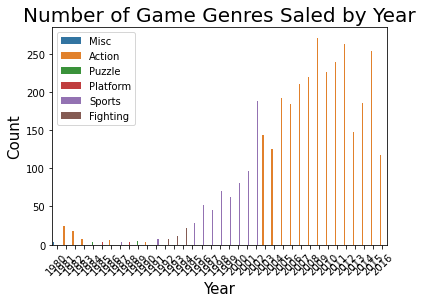

In [20]:
from matplotlib import rcParams

sns.barplot(x='Year',y='Count',hue='Genre',data=gy)

rcParams['figure.figsize'] = 15,8
plt.xticks(rotation=45)
plt.legend(loc = 'upper left')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Number of Game Genres Saled by Year',fontsize=20)
sns.set_style('whitegrid')

# 1995년 전까지는 뚜렷한 게임의 트렌드가 보이지 않다가, 1995~2002년까지 Sports의 출고량이 우세하고
# 그 후로는 Action 게임의 출고량이 많은 것을 볼 수 있다.

In [ ]:
year_genre = game.groupby(['Year', 'Genre'])['Total_Sales'].sum().unstack() # 연도별,장르별로 총 판매량의 합을 그룹화함
year_genre = year_genre.fillna(0)
year_genre

In [23]:
# h0 : 연도와 게임 장르는 서로 관련이 없다.
# h1 : 연도와 게임 장르는 서로 관련이 있다.

from scipy.stats import chi2_contingency

pvalue = chi2_contingency(year_genre)[1]
pvalue

# p값 < 0.05 이므로 귀무가설을 기각한다.
# 따라서 연도와 게임 장르는 서로 관련이 있다고 볼 수 있다.

0.0

In [24]:
# 시대별로 1980, 1990, 2000, 2010 나눠서 봤을 때 각 시대별 1위 장르
# genre_year
for i in range(len(genre_year)):

    if 1980 <= genre_year.at[i,'Year'] < 1990:
        genre_year.at[i,'Time'] = "1980's"
    elif 1990 <= genre_year.at[i,'Year'] < 2000:
        genre_year.at[i,'Time'] = "1990's"
    elif 2000 <= genre_year.at[i,'Year'] < 2010:
        genre_year.at[i,'Time'] = "2000's"
    else:
        genre_year.at[i,'Time'] = "2010's"

genre_time_max = genre_year.groupby(['Time'])['Count'].transform(max) == genre_year['Count'] 
gt = genre_year[genre_time_max]
gt = gt.sort_values('Year', ascending=True).drop_duplicates(['Time','Count'])   # 중복값 삭제
gt = gt.reset_index()
gt

,index,Year,Genre,Count,Time
0,4,1981,Action,25,1980's
1,168,1998,Sports,70,1990's
2,290,2009,Action,271,2000's
3,326,2012,Action,263,2010's


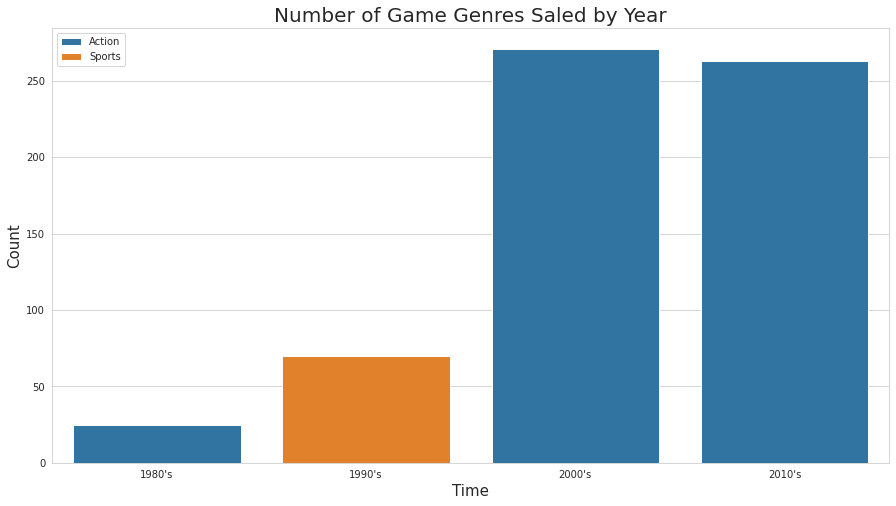

In [25]:
sns.barplot(x='Time',y='Count',hue='Genre',data=gt, dodge=False)
rcParams['figure.figsize'] = 15,8
plt.xticks(rotation=0)
plt.legend(loc = 'upper left')
plt.xlabel('Time',fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Number of Game Genres Saled by Year',fontsize=20)
sns.set_style('whitegrid')

In [26]:
# 2003년 이후 액션게임 데이터 생성
recent = game[game['Year'] >= 2003] 
action = recent[recent['Genre'] == 'Action']   # 그 중에서 장르가 Action인 데이터만 뽑음


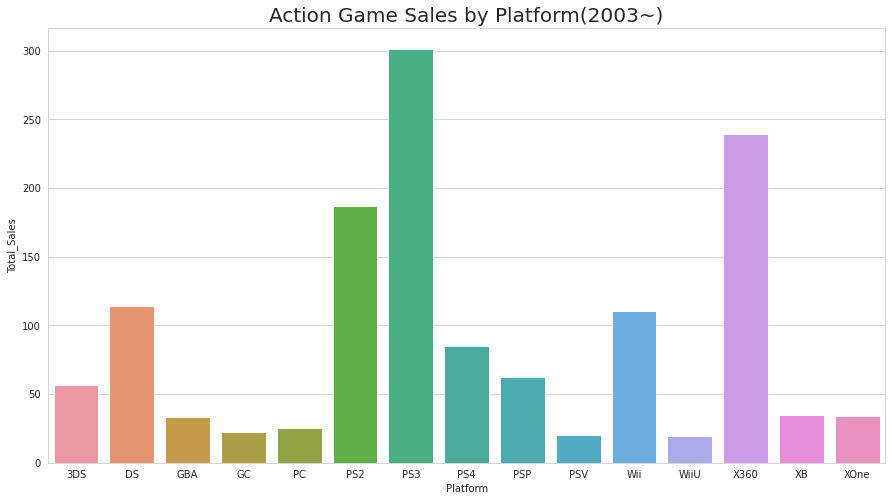

In [27]:
# 2003년 이후Action게임 Platform별 출고량 비교를 위한 시각화 진행
platform = action.groupby(['Platform'])['Total_Sales'].sum().reset_index()
platform 

plt.figure(figsize=(15,8))
sns.barplot(x='Platform',y='Total_Sales',data=platform)
plt.title('Action Game Sales by Platform(2003~)',fontsize=20)
sns.set_style('whitegrid')

# 2003년 이후 출고된 액션게임의 플랫폼은 PS3, X360이 가장 많음을 알 수 있다.

In [ ]:
# 연도별 주요 Platform 변화를 알아보기 위한 시각화

# 연도별로 출고된 주요 플랫폼의 각 갯수 추출
year_platform = action.groupby(['Year', 'Platform']).size().reset_index(name='Count')
year_platform_pivot = year_platform.pivot('Year', 'Platform', 'Count').fillna(0)
year_platform_pivot = year_platform_pivot[['3DS','DS','PS2','PS3','PS4','PSP','Wii','X360','XOne']]
year_platform_pivot

Text(0.5, 1.0, 'Action game platform trend by year')

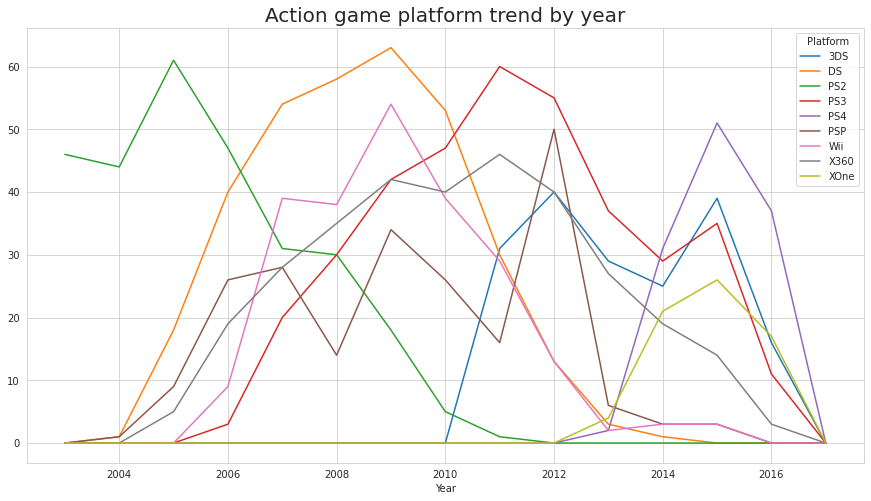

In [29]:
# PS3는 점점 줄어드는 추세이므로 게임 플랫폼은 PS4로 정한다.

year_platform_pivot.plot()
plt.title('Action game platform trend by year',fontsize=20)

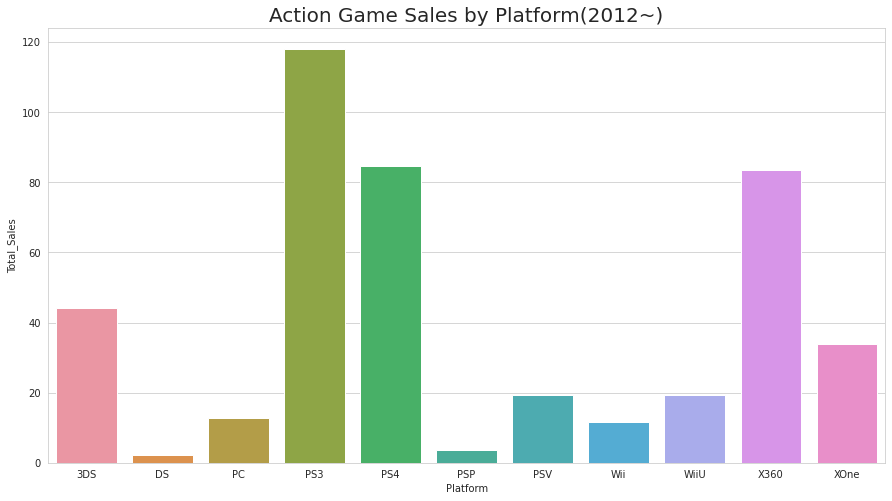

In [30]:
# 최근 10년간 action게임
recent = game[game['Year'] >= 2012] 
action = recent[recent['Genre'] == 'Action']   # 그 중에서 장르가 Action인 데이터만 뽑음

# 2012년 이후 Action게임 Platform별 출고량 비교를 위한 시각화 진행
platform = action.groupby(['Platform'])['Total_Sales'].sum().reset_index()
platform 

plt.figure(figsize=(15,8))
sns.barplot(x='Platform',y='Total_Sales',data=platform)
plt.title('Action Game Sales by Platform(2012~)',fontsize=20)
sns.set_style('whitegrid')

# 2012년 이후 출고된 액션게임의 플랫폼은 PS3, PX4, X360이 가장 많음을 알 수 있다.

Text(0.5, 1.0, 'Action game platform trend by year(2012~)')

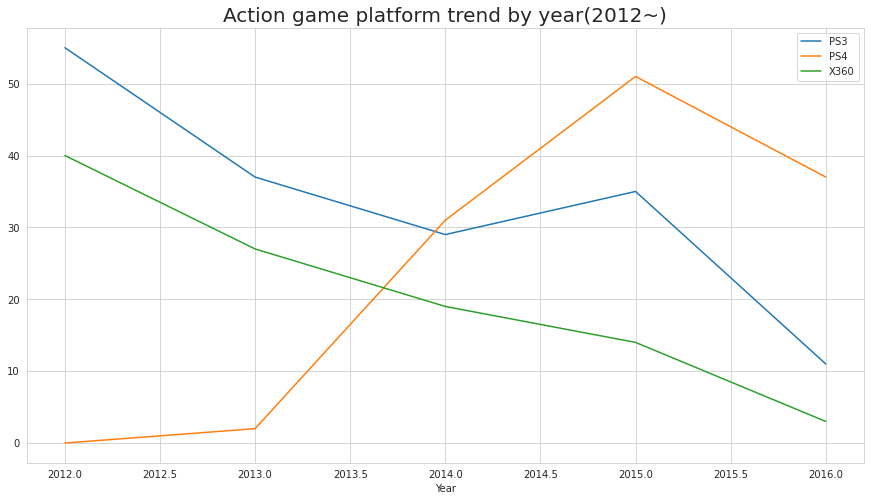

In [31]:
# 3가지 주요 Platform의 연도별 변화를 알아보기 위한 시각화

# 연도별로 출고된 주요 플랫폼의 각 갯수 추출
year_platform = action.groupby(['Year', 'Platform']).size().reset_index(name='Count')
year_platform = year_platform.drop([year_platform.index[49]])
year_platform_pivot = year_platform.pivot('Year', 'Platform', 'Count').fillna(0)
year_platform_pivot = year_platform_pivot[['PS3','PS4','X360']]

year_platform_pivot.plot()
plt.legend(loc='upper right')

# PS3와 X360은 최근들어 점점 줄어드는 추세이므로 게임 플랫폼은 PS4로 정한다.

plt.title('Action game platform trend by year(2012~)',fontsize=20)

In [32]:
# action 장르, PS4 플랫폼을 가진 데이터만 뽑아냄
action_ps4 = game[game['Genre']=='Action']
action_ps4 = action_ps4[action_ps4['Platform']=='PS4'].reset_index()
action_ps4 = action_ps4.loc[:,'Name':'Total_Sales']

<Figure size 1080x576 with 0 Axes>

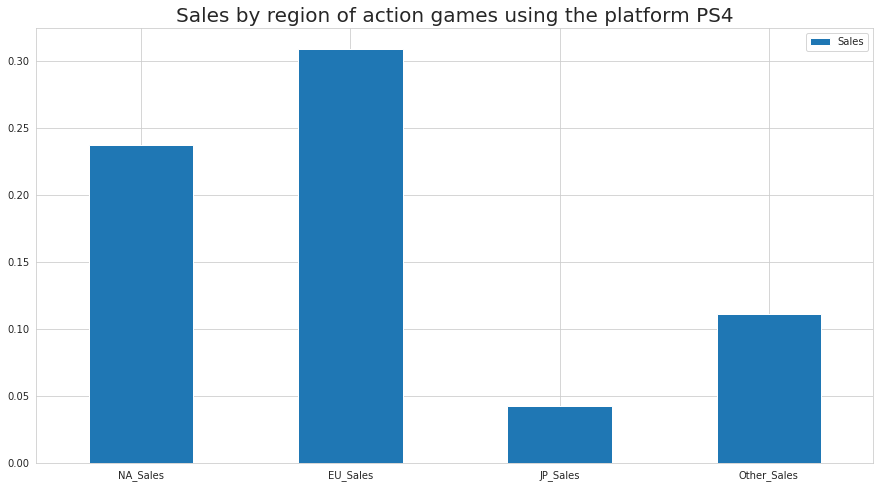

<Figure size 1080x576 with 0 Axes>

In [33]:
nasum = action_ps4['NA_Sales'].mean()
eusum = action_ps4['EU_Sales'].mean()
jpsum = action_ps4['JP_Sales'].mean()
otsum = action_ps4['Other_Sales'].mean()

# 각 지역의 출고량 평균을 합친 데이터를 만들어줌
sumdata = pd.DataFrame({'Sales':[nasum, eusum, jpsum, otsum]},index=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

sumdata.plot.bar()
plt.title('Sales by region of action games using the platform PS4',fontsize=20)
plt.xticks(rotation=0)
plt.figure(figsize=(15,8))

In [34]:
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
# 이상치를 뽑아내는 함수 만듦
def clear(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower = q1 - (iqr * 1.5)
    upper = q3 + (iqr * 1.5)
    
    return np.where((data > upper)|(data < lower))

In [36]:
na = clear(action_ps4['NA_Sales'])[0]
eu = clear(action_ps4['EU_Sales'])[0]
jp = clear(action_ps4['JP_Sales'])[0]
ot = clear(action_ps4['Other_Sales'])[0]

#이상치 모아줌
outlier = np.concatenate((na,eu,jp,ot),axis=None)

In [ ]:
acps4_index = []

# outlier에 포함되지 않으면 추가
for i in action_ps4.index :
    if i not in outlier:
        acps4_index.append(i)

action_ps4_clean = action_ps4.loc[acps4_index]
action_ps4_clean = action_ps4_clean.reset_index(drop=True)
action_ps4_clean

{'boxes': [<matplotlib.lines.Line2D at 0x7f3c45342190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c45362250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c4536e290>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c45362d10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3c45342790>,
  <matplotlib.lines.Line2D at 0x7f3c45338a10>]}

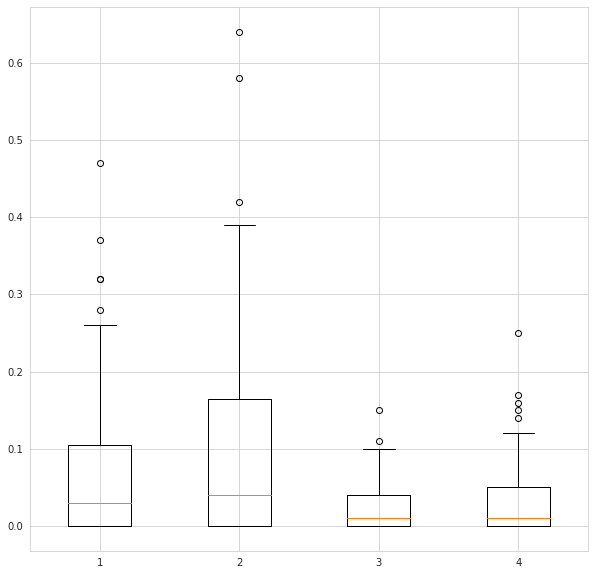

In [38]:
na_acps = action_ps4_clean['NA_Sales']
eu_acps = action_ps4_clean['EU_Sales']
jp_acps = action_ps4_clean['JP_Sales']
ot_acps = action_ps4_clean['Other_Sales']
data = na_acps, eu_acps, jp_acps, ot_acps

plt.figure(figsize=(10,10))
plt.boxplot(data)

# boxplot만 봐서는 잘 알 수 없다.

In [39]:
# H0 : PS4를 플랫폼으로한 액션게임의 출고량 평균은 네 지역 모두 같다.
# H0 : PS4를 플랫폼으로한 액션게임의 출고량 평균은 네 지역이 같지 않다.

anova_pvalue = stats.f_oneway(action_ps4['NA_Sales'], action_ps4['EU_Sales'],action_ps4['JP_Sales'], action_ps4['Other_Sales']).pvalue

# p값이 0.05보다 작으므로 귀무가설을 기각한다.
# 적어도 1개 이상의 지역의 출고량 평균이 다른 지역의 평균과 다르다.

anova_pvalue

8.432478498379803e-06

In [40]:
# 일본 지역을 제외했을 때
jp_pvalue = stats.f_oneway(action_ps4['NA_Sales'], action_ps4['EU_Sales'], action_ps4['Other_Sales']).pvalue

jp_pvalue

0.009523067824536338

In [41]:
# 기타 지역을 제외했을 때
ot_pvalue = stats.f_oneway(action_ps4['NA_Sales'], action_ps4['EU_Sales'],action_ps4['JP_Sales']).pvalue

ot_pvalue

8.904479972414197e-05

In [42]:
from scipy import stats

# h0 : 북미지역과 유럽지역의 PS4를 플랫폼으로한 액션게임의 출고량 평균은 같다.
# h1 : 북미지역과 유럽지역의 PS4를 플랫폼으로한 액션게임의 출고량 평균은 같지 않다.

na_eu_pvalue = stats.ttest_ind(action_ps4['NA_Sales'], action_ps4['EU_Sales']).pvalue

# p = 0.349 > 0.05 이므로 귀무가설을 기각할 수 없다.
# 따라서 북미지역과 유럽지역의 평균 출고량은 같다고 볼 수 있다.

na_eu_pvalue

0.34947040941961804

## 3.출고량이 높은 게임에 대한 분석 및 시각화

In [43]:
recent = game[game['Year'] >= 2003] # Action 게임이 많이 출고되기 시작한 시점인 2003년 이후 데이터로 확인
action = recent[recent['Genre'] == 'Action']    # 그 중에서 장르가 Action인 데이터만 뽑음


In [44]:
# 2003년 이후 Action장르에서 게임 출고량 총 합이 가장 큰 10개를 뽑음
tt_top = pd.DataFrame(action['Total_Sales'].groupby(action['Name']).sum())
tt_top.sort_values(by='Total_Sales',ascending=False).head(10)

# Total_Sales가 가장 높은 Grand Theft Auto V 에 대한 분석을 실행

,Total_Sales
Name,
Grand Theft Auto V,55.92
Grand Theft Auto: San Andreas,23.86
Grand Theft Auto IV,21.61
FIFA Soccer 13,16.15
LEGO Star Wars: The Complete Saga,15.73
Assassin's Creed IV: Black Flag,13.20
Assassin's Creed III,13.10
Red Dead Redemption,12.93
Pokemon HeartGold/Pokemon SoulSilver,11.90


In [45]:
# gta 데이터만 뽑아서 저장
gta = action.loc[action['Name'].str.contains('Grand Theft Auto')].reset_index()
gta = gta.loc[:,'Name':'Total_Sales']
gta = gta.drop([gta.index[4],gta.index[7]]) # 게임팩 삭제
gta = gta.reset_index().loc[:,'Name':'Total_Sales']
gta

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
1,Grand Theft Auto: Vice City Stories,PS2,2007,Action,Take-Two Interactive,0.78,0.03,0.03,0.13,0.97
2,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04
4,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
5,Grand Theft Auto: San Andreas,X360,2008,Action,Take-Two Interactive,0.08,0.03,0.00,0.01,0.12
6,Grand Theft Auto: Liberty City Stories,PS2,2006,Action,Take-Two Interactive,1.56,1.40,0.07,0.50,3.53
7,Grand Theft Auto: Chinatown Wars,DS,2009,Action,Take-Two Interactive,0.59,0.57,0.05,0.14,1.35
8,Grand Theft Auto,GBA,2004,Action,Take-Two Interactive,0.17,0.06,0.00,0.00,0.23
9,Grand Theft Auto: San Andreas,PC,2005,Action,Take-Two Interactive,0.00,0.92,0.00,0.05,0.97


In [46]:
# 각 지역별 gta 출고량을 합한 데이터프레임을 생성한다
gta_na = round(gta['NA_Sales'].sum(),2)
gta_eu = round(gta['EU_Sales'].sum(),2)
gta_jp = round(gta['JP_Sales'].sum(),2)
gta_ot = round(gta['Other_Sales'].sum(),2)
data = gta_na, gta_eu, gta_jp, gta_ot
gtadata = pd.DataFrame({'gta':[gta_na, gta_eu, gta_jp, gta_ot]},index=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
gtadata

,gta
NA_Sales,53.73
EU_Sales,39.30
JP_Sales,2.96
Other_Sales,25.42


Text(0.5, 1.0, 'GTA Sales by Region')

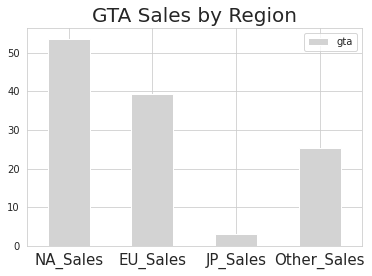

In [47]:
# 지역별 gta 출고량 데이터 시각화
gtadata.plot.bar(color='lightgray')
plt.xticks(rotation=0,fontsize=15)
plt.title('GTA Sales by Region',fontsize=20)

# 지역별 gta출고량을 봤을 때 일본지역에서의 출고량이 가장 낮은 것을 알 수 있다.

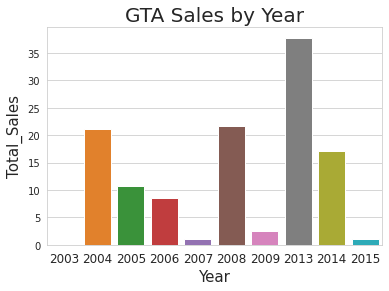

In [48]:
# 연도별 gta 출고량 시각화

gta_year = gta.groupby('Year').sum()
gta_year = gta_year.reset_index()
gta_year

plt.xticks(fontsize=12)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.title('GTA Sales by Year',fontsize=20)
sns.barplot(x='Year',y='Total_Sales',data=gta_year)

# 그래프를 보면 연도별로 출고량이 다름을 볼 수 있고, 2013년의 출고량이 가장 큼을 알 수 있다.

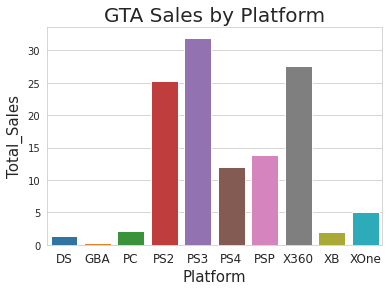

In [49]:
# 연도별 gta 출고량 시각화

gta_platform = gta.groupby('Platform').sum()
gta_platform = gta_platform.reset_index()
gta_platform

plt.xticks(fontsize=12)
plt.xlabel("Platform", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.title('GTA Sales by Platform',fontsize=20)
sns.barplot(x='Platform',y='Total_Sales',data=gta_platform)

# 그래프를 보면 연도별로 출고량이 다름을 볼 수 있고, 2013년의 출고량이 가장 큼을 알 수 있다.

## '다음 분기에 어떤 게임을 설계해야 할까?'에 대한 결론

: 지역별로 선호하는 게임에는 별 차이가 없으니 장르는 최근 상승세를 보이는 Action을 선택하고 Platform은 PS4로 설계한다.

## 추가분석
 
 * 다음 분기에 일본에서 게임을  출시할 계획이라면?
 
 (제일 인기 많은 게임 장르도 다른 지역들과 다르고, GTA의 출고량도 적어서 선택)

In [ ]:
# 일본에서의 게임 출고량 데이터만 뽑음
jp_game = game[['Name','Platform','Year','Genre','Publisher','JP_Sales']]

# 출고량이 0인 데이터 삭제
indexNames = jp_game[jp_game['JP_Sales'] == 0 ].index
jp_game.drop(indexNames , inplace=True)
jp_game

Text(0.5, 1.0, 'Sales by game genre in Japan')

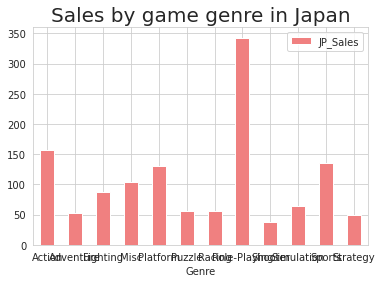

In [62]:
jp_genre = pd.DataFrame(jp_game.groupby(['Genre'])['JP_Sales'].sum())
jp_genre.plot.bar(color='lightcoral')
plt.xticks(rotation=0)
plt.title('Sales by game genre in Japan',fontsize=20)

Text(0.5, 1.0, 'Sales by game genre in Japan')

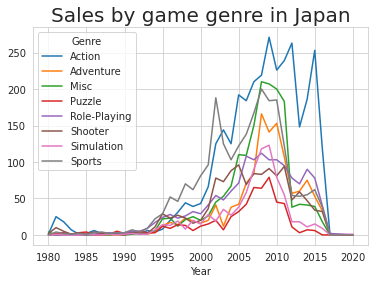

In [53]:
# 연도별 출고된 플랫폼의 각 갯수 추출
jp_genre = jp_game.groupby(['Year', 'Genre']).size().reset_index(name='Count')

jp_genre_pivot = jp_genre.pivot('Year', 'Genre', 'Count').fillna(0)
jp_genre_pivot = jp_genre_pivot[['Action','Adventure','Misc','Puzzle','Role-Playing','Shooter','Simulation','Sports']]
jp_genre_pivot
jp_genre_pivot.plot()
plt.title('Sales by game genre in Japan',fontsize=20)

# Action장르가 2010년 이후 증가하는 추세를 보임



In [54]:
# 최근 10년간 일본 게임 데이터 추출
jp_recent = jp_game[jp_game['Year']>=2012]

Text(0.5, 1.0, 'Sales by game genre in Japan(2012~)')

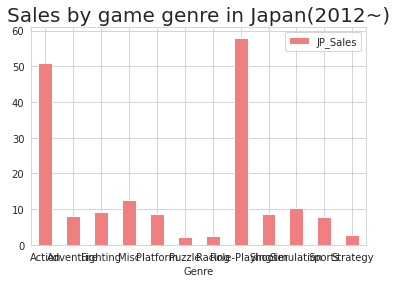

In [55]:
# 2012년 이후 일본에서의 게임 장르별 출고량을 확인했을 때 Action장르의 출고량이 크지만 여전히 Role-Playing의 출고량이 가장 큰 것을 확인할 수 있다.
jp_genre_r = pd.DataFrame(jp_recent.groupby(['Genre'])['JP_Sales'].sum())
jp_genre_r.plot.bar(color='lightcoral')
plt.xticks(rotation=0)
plt.title('Sales by game genre in Japan(2012~)',fontsize=20)

In [56]:
# 2012년 이후 Role-Playing 장르의 일본데이터만 추출
jp_roleplaying = jp_recent[jp_recent['Genre']=='Role-Playing']
jp_roleplaying.sort_values(by='JP_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,JP_Sales
15674,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,3.44
12966,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,3.18
15678,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,3.14
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,3.08
5147,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,Level 5,2.68
...,...,...,...,...,...,...
3394,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,Namco Bandai Games,0.00
11102,Risen 2: Dark Waters,X360,2012,Role-Playing,Deep Silver,0.00
10807,Game of Thrones,PC,2012,Role-Playing,Focus Home Interactive,0.00
10765,Etrian Odyssey 2 Untold: Knight of Fafnir,3DS,2014,Role-Playing,Atlus,0.00


Text(0.5, 1.0, 'Sales by Role-Playing game platform in Japan(2012~)')

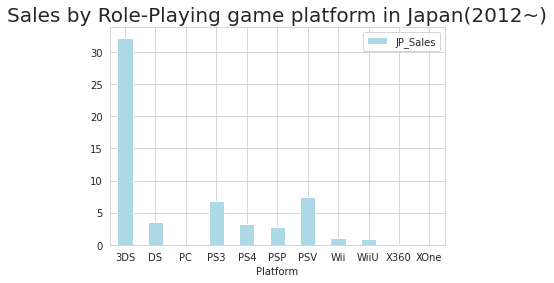

In [57]:
# 최근 10년간 role-playing 게임의 platform을 확인했을 때 3DS가 압도적으로 높음을 알 수 있음
jp_platform = pd.DataFrame(jp_roleplaying.groupby(['Platform'])['JP_Sales'].sum())
jp_platform.plot.bar(color='lightblue')
plt.xticks(rotation=0)
plt.title('Sales by Role-Playing game platform in Japan(2012~)',fontsize=20)

In [58]:
# 2012년 이후 Action 장르의 일본데이터만 추출
jp_action = jp_recent[jp_recent['Genre']=='Action']
jp_action.sort_values(by='JP_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,JP_Sales
10892,Monster Hunter X,3DS,2015,Action,Capcom,2.78
6084,Yokai Watch Busters,3DS,2015,Action,Level 5,2.28
8824,Yokai Watch 3,3DS,2016,Action,Level 5,1.27
2028,Luigi's Mansion: Dark Moon,3DS,2013,Action,Nintendo,1.10
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,0.97
...,...,...,...,...,...,...
7881,The Amazing Spider-Man (Console Version),DS,2012,Action,Activision,0.00
7906,Lego Batman 3: Beyond Gotham,X360,2014,Action,Warner Bros. Interactive Entertainment,0.00
7947,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS4,2016,Action,Activision,0.00
8196,God of War Saga,PS3,2012,Action,Sony Computer Entertainment,0.00


Text(0.5, 1.0, 'Sales by Action game platform in Japan(2012~)')

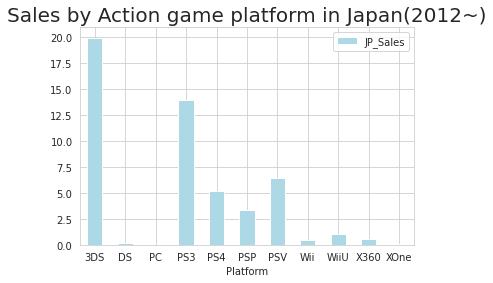

In [59]:
# 최근 10년간 Action장르의 게임의 platform을 확인했을 때 3DS가 가장 높고 다음으로 PS3가 높음을 알 수 있음
jp_platform_action = pd.DataFrame(jp_action.groupby(['Platform'])['JP_Sales'].sum())
jp_platform_action.plot.bar(color='lightblue')
plt.xticks(rotation=0)
plt.title('Sales by Action game platform in Japan(2012~)',fontsize=20)

In [60]:
# 다음 분기 일본을 목표로 게임을 설계한다면 Action장르 또는 Role-Playing장르의 게임을 3DS플랫폼으로 설계한다.